In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [2]:
! git pull

Already up to date.


In [5]:
! python train_adipose.py -mf --name full_conv5_0 --epochs 10 --steps 100 --model full_conv5 -lr lr_mul_inv

2020-08-13 17:01:04.078991: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-13 17:01:05.220953: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-13 17:01:05.237464: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-13 17:01:05.237861: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.77GHz coreCount: 40 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2020-08-13 17:01:05.237881: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-13 17:01:05.239082: I tensorflow/stream_executor/pla

In [6]:
import tensorflow as tf
import tensorflow.keras as keras
from model_tools import load_dataset, load_valset
import time

In [7]:

import matplotlib.pyplot as plt

In [8]:
Model_Name = 'full_conv5_0'

In [9]:
trained_model = keras.models.load_model('saved_model/'+Model_Name)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: GeForce RTX 2070 SUPER, compute capability 7.5


In [10]:
val_ds = load_valset('val_image',10)
test_ds = load_dataset('test_image',10)

In [11]:
img_batch, mask_batch = list(val_ds.take(1).as_numpy_iterator())[0]
print(img_batch.shape)
print(mask_batch.shape)

(32, 200, 200, 3)
(32, 100, 100)


In [13]:
st = time.time()
predict_batch = trained_model(img_batch)
print('took:{}'.format(time.time()-st))

took:0.01664423942565918


In [14]:
print(predict_batch.shape)

(32, 100, 100)


In [15]:
import numpy as np

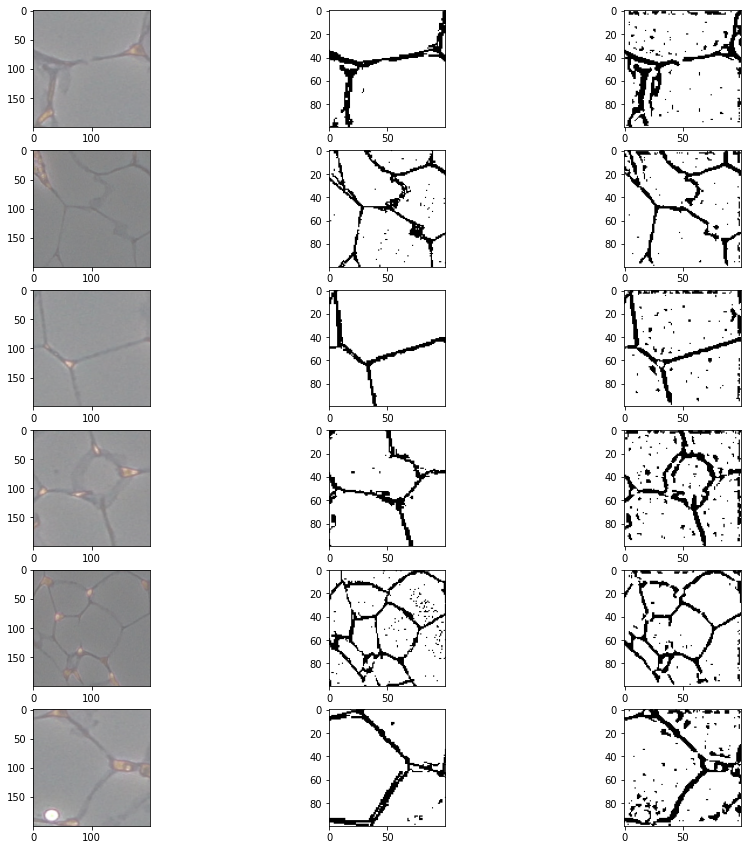

In [18]:
fig = plt.figure(figsize=(15,15))
i = 1
n = 6
for img, mask, pred in zip(img_batch[:n],mask_batch[:n],predict_batch[:n]):
    ax = fig.add_subplot(n,3,i)
    ax.imshow(img)
    ax = fig.add_subplot(n,3,i+1)
    ax.imshow(mask, cmap='binary')
    ax = fig.add_subplot(n,3,i+2)
    ax.imshow(pred>0.6, cmap='binary')
    i += 3
plt.show()

In [19]:
print(predict_batch[0][0])
print(np.min(predict_batch[0]))
print(np.max(predict_batch[0]))

tf.Tensor(
[0.10230471 0.06394842 0.10105591 0.15115306 0.21223202 0.19314736
 0.16264586 0.15636235 0.16776334 0.17881244 0.1769559  0.1447523
 0.11104825 0.08882029 0.08570927 0.10631888 0.12431929 0.13028541
 0.14187483 0.12852514 0.14596547 0.16424818 0.1908748  0.27649513
 0.31859115 0.33111975 0.28487435 0.23370637 0.23248434 0.19946389
 0.12400071 0.10338596 0.11417085 0.1464531  0.18097353 0.15418488
 0.11636177 0.10818896 0.10725033 0.14499426 0.18639107 0.19977595
 0.18787657 0.14903529 0.1468197  0.1816984  0.254787   0.300335
 0.23283306 0.16371267 0.13443464 0.13262686 0.18039528 0.26359943
 0.3511998  0.31038073 0.15843461 0.11496336 0.10631888 0.12907304
 0.15674922 0.18683577 0.16572808 0.15405758 0.16545822 0.18476751
 0.18184364 0.15752527 0.14378779 0.15253653 0.18609506 0.21469143
 0.1899715  0.14463143 0.13546066 0.18579942 0.22303842 0.21011727
 0.14330755 0.10374863 0.10484337 0.11104825 0.11576065 0.1126001
 0.14318772 0.19314736 0.20689406 0.2043419  0.18198898

In [20]:
print(img_batch[0][0])
print(np.min(img_batch[0]))
print(np.max(img_batch[0]))

[[0.59607846 0.6        0.60784316]
 [0.5921569  0.59607846 0.6039216 ]
 [0.5921569  0.59607846 0.6039216 ]
 [0.5882353  0.5921569  0.6039216 ]
 [0.5921569  0.59607846 0.6039216 ]
 [0.5921569  0.59607846 0.6039216 ]
 [0.5921569  0.59607846 0.6039216 ]
 [0.5921569  0.59607846 0.6039216 ]
 [0.5882353  0.5921569  0.6       ]
 [0.5882353  0.5921569  0.6       ]
 [0.5882353  0.5921569  0.6       ]
 [0.5882353  0.5921569  0.6       ]
 [0.5921569  0.59607846 0.6039216 ]
 [0.5921569  0.59607846 0.6039216 ]
 [0.5921569  0.59607846 0.6       ]
 [0.5921569  0.5921569  0.6       ]
 [0.5882353  0.5882353  0.59607846]
 [0.59607846 0.6        0.6039216 ]
 [0.6        0.6        0.60784316]
 [0.59607846 0.59607846 0.6039216 ]
 [0.5921569  0.59607846 0.6039216 ]
 [0.5921569  0.59607846 0.6       ]
 [0.5921569  0.59607846 0.6039216 ]
 [0.59607846 0.6        0.60784316]
 [0.6        0.6        0.6117647 ]
 [0.6        0.6039216  0.6117647 ]
 [0.6        0.6039216  0.6117647 ]
 [0.6        0.6039216  0.61